<a href="https://colab.research.google.com/github/delrio-jaemee/CSST106-CS4B-DELRIO/blob/main/4B_DEL_RIO_EXER_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Harris Corner Detection

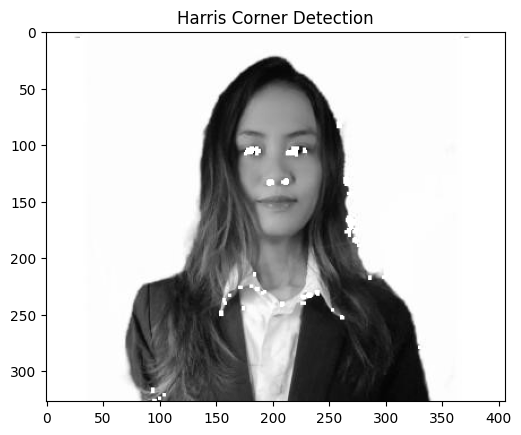

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image in grayscale
img = cv2.imread('/content/jae (1).jpg', cv2.IMREAD_GRAYSCALE)

# Apply Harris corner detection
gray = np.float32(img)
dst = cv2.cornerHarris(gray, 2, 0, 0.04)

# Dilate the corner points to make them more visible
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01 * dst.max()] = 255  # Mark corners in white

# Display the image with corners
plt.imshow(img, cmap='gray')
plt.title('Harris Corner Detection')
plt.show()

Histogram of Oriented Gradient

(2503116,)
[0. 0. 0. ... 0. 0. 0.]


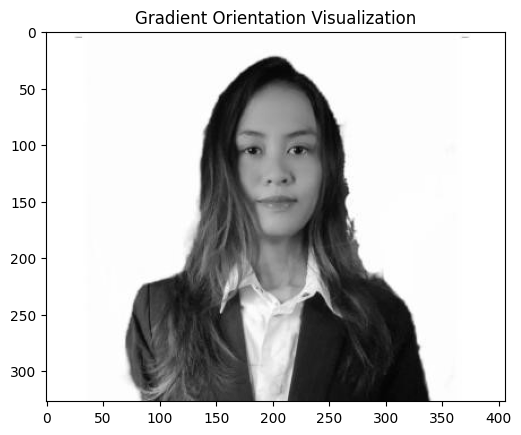

In [ ]:
# Load the image in grayscale
img = cv2.imread('/content/jae (1).jpg', cv2.IMREAD_GRAYSCALE)

# Convert image to grayscale if it's not already
if len(img.shape) == 3:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Calculate HOG features
winSize = (64, 64)  # Adjust window size as needed
blockSize = (16, 16)  # Adjust block size as needed
blockStride = (8, 8)  # Adjust block stride as needed
cellSize = (8, 8)  # Adjust cell size as needed
nbins = 9  # Number of orientation bins
hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
features = hog.compute(img)

# Visualize gradient orientation
image_hog = hog.compute(img, winStride=(8, 8), padding=(0, 0))
image_hog = np.reshape(image_hog,(image_hog.shape[0]))
print(image_hog.shape)
print(image_hog)

# Display the image with gradient orientation visualization
plt.imshow(img, cmap='gray')
plt.title('Gradient Orientation Visualization')
plt.show()

Feature Accelerated Segment Test

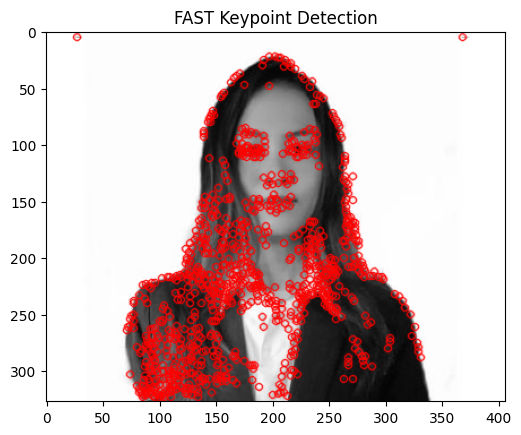

In [ ]:
# Load the image in grayscale
img = cv2.imread('/content/jae (1).jpg', cv2.IMREAD_GRAYSCALE)

# Apply FAST feature detection
fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(img, None)

# Draw keypoints on the image
img2 = cv2.drawKeypoints(img, keypoints, None, color=(255, 0, 0))

# Display the image with keypoints
plt.imshow(img2)
plt.title('FAST Keypoint Detection')
plt.show()

Feature Matching using ORB and FLANN

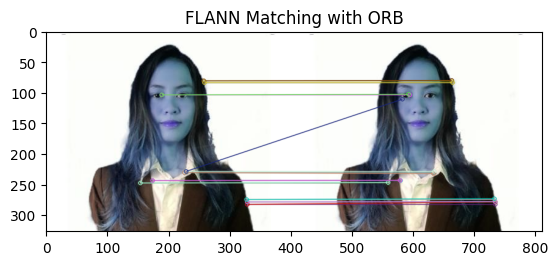

In [ ]:
# Load two images
image1 = cv2.imread('/content/jae (1).jpg')
image2 = cv2.imread('/content/jae (1).jpg')

# ORB Detector
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Initialize matcher using FLANN
FLANN_INDEX_LSH = 6  # Use LSH index for binary descriptors
index_params = dict(algorithm=FLANN_INDEX_LSH,
                    table_number=6,  # 12
                    key_size=12,     # 20
                    multi_probe_level=1)  # 2
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match Descrpitors
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Sort the matches base on distance
matches = sorted(matches, key=lambda x: x[0].distance)

# Draw matches
image_matches = cv2.drawMatchesKnn(image1, keypoints1, image2, keypoints2, matches[:10], None,
                                    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.imshow(image_matches)
plt.title('FLANN Matching with ORB')
plt.show()

Image Segmentation using Watershed Algorithm

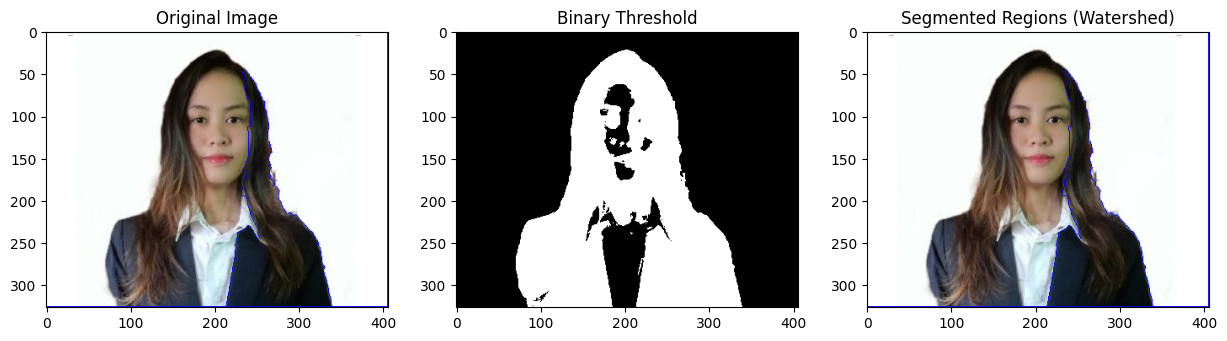

In [ ]:
# Load the image
image = cv2.imread('/content/jae (1).jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remove noise with morphological operations
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Determine sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all markers to distinguish the unknown region as 0
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed algorithm
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Mark boundaries with red

# Visualize the result
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Binary Threshold')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Regions (Watershed)')

plt.show()